# Machine Learning
## Tarea 1 : Problema de Clasificación y de Regresión Lineal
---
__PROFESOR : Rodrigo Hernández__

__ALUMNOS : Roy Barrera - José Pérez__

---

# Problema de modelo de regresión lineal

---

__1 CONTEXTO__ 

En la actualidad las empresas de Telecomunicaciones están inmersas en un mercado muy competitivo, donde continuamente surgen nuevas y mejores ofertas para atraer clientes de empresas de la competencia. 
Fidelizar a los clientes se ha convertido entonces en unos de los focos principales para las empresas de telecomunicaciones, en donde prestamos servicios de consultoría en la gerencia de TI.
Dentro del ámbito de los clientes fidelizados de esta compañía de telecomunicaciones, uno de los indicadores claves es ofertar y mantener una relación costo-beneficio, lo más cercana a lo óptimo desde el punto de vista económico de la empresa. Esto se traduce en ofrecer servicios que se ajusten al presupuesto del cliente para el ítem "Gasto mensual en Telecomunicaciones".

Dicho lo anterior, la pregunta de valor que se quiere responder es:

__2 PREGUNTA DE VALOR__


¿Podremos predecir correctamente el presupuesto mensual destinado para el ítem "Gasto en Telecomunicaciones"?

Considerando la anterior pregunta de valor, es entonces que se usa el set de datos "VII encuesta familiar de presupuesto" elaborada por el INE, en pos de intentar modelar y predecir correctamente la pregunta que se hace.

Ya se cuenta con un set de datos previamente trabajado. Se analizaron las variables candidatas a ser usadas, se realizó una limpieza de los datos, para asegurar el correcto funcionamiento de las operaciones a ser realizadas sobre ellos, y también se efectuaron transformaciones de los datos para tener otros puntos de vistas de los mismos. Siendo los mismos datos, su interpretación puede ser diferente, según la óptica con la cual se los vea.



In [1]:
# Son importadas las librerías y módulos requeridos. 

# Manejo de Data Frame
import pandas as pd

# Manejo de vectores y matrices
import numpy as np

# Manejo de gráfica
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import scatter_matrix

# Magic para graficar dentro del notebook
%matplotlib inline

# Manejo de estadísticos de base
from scipy import stats

# Manejo de particiones para muestras
from sklearn.model_selection import train_test_split

# Manejp de moodelo de regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RANSACRegressor  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


__3 DESCRIPCION DE LOS DATOS__

Considerar que el set de datos a usar en principio es el mismo que el usado para el problema de Clasificadores. En ese sentido es que se realizó una tarea de Exploración de los datos, preseleccionando un set de datos que llamamos 'Gasto_x_Familia.csv'. Mayores detalles de esta tarea se pueden ver en el archivo Tarea1_ML_BarreraPerez_01_EXPLORACION_v2.pdf

In [2]:
# Rescata el set de datos. Recordar que este set de datos esta previamente trabajado, incorporando aquellas variables
# pre-candidatas a ser usadas.
df_t01 = pd.read_csv('Gasto_x_Familia.csv', sep=';', decimal='.')

__3.1 Resumen del tipo de datos utilizados__

Mediante la función info(), se obtiene resumen de los datos usados.

In [3]:
# Miramos las variables pre-candidatas a ser usadas, los nombres de las columnas y su tipo. También miramos la cantidad
# de muestras del set de datos.
df_t01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 10 columns):
Personas             4941 non-null int64
Gastos               4941 non-null int64
Ingresos             4941 non-null int64
Categoria            4941 non-null object
G1_Alimentacion      4941 non-null float64
G2_Bebidas           4941 non-null float64
G8_Comunicaciones    4941 non-null float64
G9_Recreacion        4941 non-null float64
G10_Educacion        4941 non-null float64
G11_Restaurantes     4941 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 386.1+ KB


__3.2 Descripción del comportamiento univariado__

Se usa la función describe(), para conocer el comportamiento univariado del set de datos.

In [4]:
# Miramos los valores estadisticos de las variables del set de datos.
df_t01.describe()

,Personas,Gastos,Ingresos,G1_Alimentacion,G2_Bebidas,G8_Comunicaciones,G9_Recreacion,G10_Educacion,G11_Restaurantes
count,4941.000000,4.941000e+03,4.941000e+03,4.941000e+03,4941.000000,4941.000000,4.941000e+03,4.941000e+03,4.941000e+03
mean,3.970451,1.614312e+06,1.923799e+06,2.749368e+05,30510.643128,80189.430258,1.144853e+05,1.506017e+05,1.087676e+05
std,1.548781,1.308729e+06,2.069036e+06,1.785312e+05,42820.808602,60006.240471,1.764910e+05,2.194059e+05,1.499305e+05
min,1.000000,6.237700e+04,3.070000e+02,1.937500e+03,3.216987,3.684826,3.352893e+01,6.429251e+00,3.747312e+01
25%,3.000000,7.897710e+05,7.466670e+05,1.532214e+05,5000.000000,40113.968095,2.528150e+04,4.291667e+03,2.179672e+04
50%,4.000000,1.224790e+06,1.280000e+06,2.376860e+05,15684.408430,67458.153461,6.060895e+04,6.793332e+04,6.066429e+04
75%,5.000000,1.982535e+06,2.252900e+06,3.550237e+05,39679.998779,105031.643441,1.323217e+05,2.037500e+05,1.339603e+05
max,17.000000,1.897800e+07,3.026667e+07,2.407691e+06,517805.942127,770836.560757,2.391135e+06,2.397525e+06,2.536041e+06


In [5]:
# Seleccionamos la variable objetivo a ser usada en el modelo de regresión lineal; la caracteristica G8_Comunicaciones,
# que corresponde al gasto mensual en el item Comunicaciones. 
y = df_t01['G8_Comunicaciones']
print(y)

0        75693.396226
1       110929.322637
2       145270.167519
3        40113.968095
4        75000.000000
5        90000.000000
6       125026.116203
7       266450.549451
8        75055.555556
9       133214.125226
10      130044.070517
11       20990.000000
12       70000.000000
13         410.656003
14       76000.000000
15       89856.511527
16      101208.834778
17       75682.027621
18       21925.536677
19       31003.972937
20       83000.000000
21       20000.000000
22      151735.241451
23       18142.638417
24       99016.051102
25        3957.770398
26       75000.000000
27       55980.000000
28       17942.363504
29       90050.850596
            ...      
4911     69674.000303
4912     38422.209715
4913    167823.272245
4914    180380.530486
4915    100388.813604
4916    142346.250000
4917     58000.000000
4918     34133.333496
4919    101539.325843
4920    139503.000000
4921     52000.000000
4922     75400.000000
4923     70900.000000
4924     68050.952537
4925     4

In [6]:
# Seleccionamos las variables predictoras:
# G1_Alimentación Gasto mensual en alimentación.
# G2_Bebidas  Gasto mensual en bebidas alcoholicas.
# G9_Recreacion Gasto mensual en recreación.
# G10_Educacion Gasto mensual en educación.
# G11_Restaurantes Gasto mensual en Restaurantes y Hoteles.

x = df_t01.drop([ 'Personas','Gastos', 'Ingresos', 'Categoria', 'G8_Comunicaciones'], axis=1)
print(x)

      G1_Alimentacion     G2_Bebidas  G9_Recreacion  G10_Educacion  \
0       281100.250000   42993.125000   64276.382051   3.994667e+04   
1       255973.527878  137113.429554  203061.496236   4.708044e+04   
2       202343.931967     307.170378   50029.641672   9.870833e+04   
3       113543.777348     663.321978    1037.017201   9.166667e+04   
4        15000.000000   14100.000000  150000.000000   2.785000e+05   
5       467673.750000   20324.375000  369996.812500   5.109167e+05   
6       356125.170050     152.002639  418421.896134   2.171667e+05   
7       171942.227133  128298.666504  434327.298385   2.540000e+05   
8       184402.468414   27877.266357  119626.548559   2.500000e+04   
9       471096.042965  103929.885301  108317.113875   2.691667e+05   
10       65249.503246   19662.501109  220978.476957   3.537500e+05   
11       29280.000000   43600.000000   36701.509434   4.129167e+05   
12      221896.062500   16798.125000   20329.727210   3.291667e+04   
13      251157.54513

__4 Elaboración de gráfica__

A continuación se codifica y muestran los graficos que describen las variables a ser usadas.

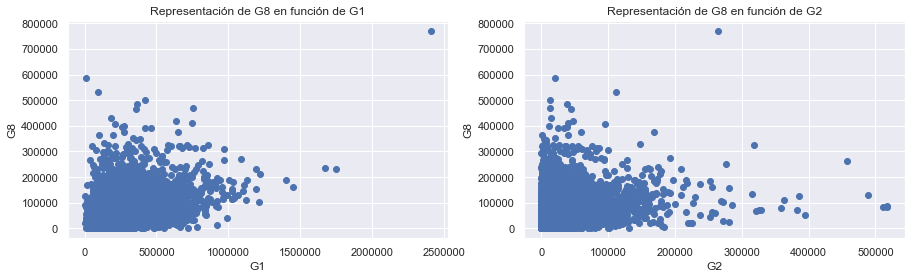

In [7]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)
 
# Represento los puntos para la variable X1 y para Y
p1.scatter(x.G1_Alimentacion, y)
p1.set_title(u'Representación de G8 en función de G1')
p1.set_xlabel('G1')
p1.set_ylabel('G8')
 
p2.scatter(x.G2_Bebidas, y)
p2.set_title(u'Representación de G8 en función de G2')
p2.set_xlabel('G2')
p2.set_ylabel('G8')

plt.show()



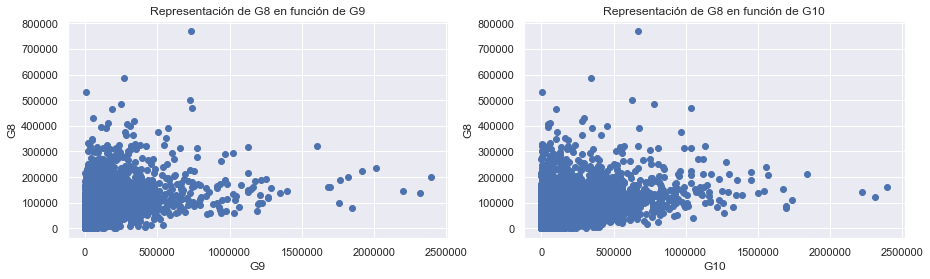

In [8]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)

# Represento los puntos para la variable X1 y para Y
p1.scatter(x.G9_Recreacion, y)
p1.set_title(u'Representación de G8 en función de G9')
p1.set_xlabel('G9')
p1.set_ylabel('G8')
 
p2.scatter(x.G10_Educacion, y)
p2.set_title(u'Representación de G8 en función de G10')
p2.set_xlabel('G10')
p2.set_ylabel('G8')

plt.show()


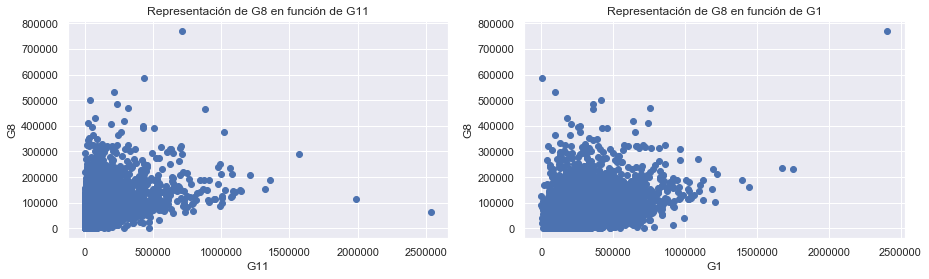

In [9]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)

# Represento los puntos para la variable X1 y para Y
p1.scatter(x.G11_Restaurantes, y)
p1.set_title(u'Representación de G8 en función de G11')
p1.set_xlabel('G11')
p1.set_ylabel('G8')
 
p2.scatter(x.G1_Alimentacion, y)
p2.set_title(u'Representación de G8 en función de G1')
p2.set_xlabel('G1')
p2.set_ylabel('G8')

plt.show()


__5	Especificación, implementación validación, comparación y decisión del modelo de regresión lineal óptimo.__

A continuación se aborda la tarea que entrenar el modelo de regresión lineal y probar su validez.

__5.1 Separación del set de datos__

Es separado el set de datos en 2 subconjuntos. El 70% de los datos se deja para el entrenamiento, y el 30% restante se usará para hacer la prueba.

In [10]:
# Realizamos la selección de dataset para entrenamiento y para prueba.
# El 70% de los datos serán usados para entrenar y el 30% restante para probar.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(x_train.shape); print(x_test.shape)
print(y_train.shape); print(y_test.shape)

(3458, 5)
(1483, 5)
(3458,)
(1483,)


In [11]:
# Realizamos la instanciación del modelo de regresión lineal, con los datos seleccionados para el entrenamiento.

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
type(model)

sklearn.linear_model.base.LinearRegression

In [12]:
# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred_train= model.predict(x_train)
print("Entrenamiento, Error cuadratico medio:",np.sqrt(round(mean_squared_error(y_train,pred_train),3)))
print("Entrenamiento, R2:", r2_score(y_train, pred_train))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(model.coef_)-1)-1)*(1 - r2_score(y_train, pred_train))
print("Entrenamiento, R2 ajustado:", adj)

pred_test= model.predict(x_test)
print("Testing: Error cuadratico medio", np.sqrt(round(mean_squared_error(y_test,pred_test), 3)))
print("Testing: R2", r2_score(y_test, pred_test))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(model.coef_)-1)-1)*(1 - r2_score(y_test, pred_test))
print("Testing: R2 ajustado", adj)

Entrenamiento, Error cuadratico medio: 50812.62467905983
Entrenamiento, R2: 0.2594766202385689
Entrenamiento, R2 ajustado: 0.2586187883477361
Testing: Error cuadratico medio 53685.01437433914
Testing: R2 0.2535958133693763
Testing: R2 ajustado 0.2515757749752474


### OBSERVACION :
__5.2 Resultados para el modelo de regresión lineal__
Vemos que el EMS es muy grande¡¡¡, y que el R2 junto con R2 ajustado indican que el entrenamiento y la prueba del 
modelo de regresión son de baja calidad. El modelo de regresión lineal no sirve para predecir la variable objetivo
elegida, a partir de las variables predictoras seleccionadas.  

Se observa que hay __UNDERFITTING__

In [13]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(model.coef_),"pvalue": pvalues})
print(coef)

     Caracteristica  Coefficiente lineal  pvalue
0   G1_Alimentacion             0.062499     0.0
1        G2_Bebidas             0.114281     0.0
2     G9_Recreacion             0.049159     0.0
3     G10_Educacion             0.047648     0.0
4  G11_Restaurantes             0.069540     0.0


Se ve que ninguna de las caracteristicas se encuentra relacionada con la variable objetivo G8_Alimentación, pues en todos
los casos el coeficiente lineal se encuentra entre -0.3 y 0.3
Veamos si el modelo mejora quitando los outliers, para ello entonces usaremos RANSAC

__5.3 Estrategia de regularización__

Se implementan 4 estrategias de regularización para el modelo de regresión, a saber:

a. Modelo de regresión lineal RANSAC

b. Modelo de regresión lineal RIDGE

c. Modelo de regresión lineal LASSO

d. Modelo de regresión lineal ELASTICNET

In [14]:
# Instanciamos el modelo lineal Ransac
ransac = RANSACRegressor()

# Entrenamos el modelo lineal Ransac
ransac.fit(x_train, y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
pred_train= ransac.predict(x_train)
print("Entrenamiento, Error cuadratico medio:",np.sqrt(round(mean_squared_error(y_train,pred_train),3)))
print("Entrenamiento, R2:", r2_score(y_train, pred_train))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len( ransac.estimator_.coef_)-1)-1)*(1 - r2_score(y_train, pred_train))
print("Entrenamiento, R2 ajustado:", adj)

pred_test= ransac.predict(x_test)
print("Testing: Error cuadratico medio", np.sqrt(round(mean_squared_error(y_test,pred_test), 3)))
print("Testing: R2", r2_score(y_test, pred_test))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(ransac.estimator_.coef_)-1)-1)*(1 - r2_score(y_test, pred_test))
print("Testing: R2 ajustado", adj)

Entrenamiento, Error cuadratico medio: 62784.935801241365
Entrenamiento, R2: -0.13059334952084622
Entrenamiento, R2 ajustado: -0.13190304352550397
Testing: Error cuadratico medio 61763.11875231852
Testing: R2 0.012069587984273378
Testing: R2 ajustado 0.009395892687884433


### OBSERVACION

Los valores lejos de mejorar, empeoraron. El EMS aumentó, y tanto el R2 y el R2 ajustado disminuyeron.

Se observa que hay __UNDERFITTING__


__¿Qué pasará con las correlación de las características?__

In [15]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(ransac.estimator_.coef_),"pvalue": pvalues})
print(coef)

     Caracteristica  Coefficiente lineal  pvalue
0   G1_Alimentacion            -0.024155     0.0
1        G2_Bebidas            -0.416474     0.0
2     G9_Recreacion             0.127737     0.0
3     G10_Educacion             0.110495     0.0
4  G11_Restaurantes             0.070668     0.0


Aún cuando el coeficiente linael aumenta para las caracteristicas G1_Alimentacion y G2_Bebidas, se mantiene dentro del 
rango -0.3 y 0.3
Veamos si mejora los resultados al usar el modelo lineal Ridge de penalización de los coeficientes.

In [16]:
# Instanciamos el modelo Ridge, penalización de los coefientes. Usamos para ello alpha = 1
ridge = Ridge(alpha=1)

# Entrenamos el modelo Ridge
ridge.fit(x_train, y_train)

# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
pred_train_rr= ridge.predict(x_train)
print("Ridge/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("Ridge/Ent -  R2:", r2_score(y_train, pred_train_rr))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(ridge.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_rr))
print("Ridge/Ent - adjR2:", adj)

pred_test_rr= ridge.predict(x_test)
print("Ridge/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print("Ridge/Test -  R2:", r2_score(y_test, pred_test_rr))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(ridge.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_rr))
print("Ridge/Test - adjR2:", adj)

Ridge/Ent - MSE: 50812.62467906379
Ridge/Ent -  R2: 0.2594766202385689
Ridge/Ent - adjR2: 0.2586187883477361
Ridge/Test - MSE: 53685.01437433809
Ridge/Test -  R2: 0.2535958133693771
Ridge/Test - adjR2: 0.2515757749752482


No se ve mejora usando el modelo Ridge.

Se observa que hay __UNDERFITTING__

__Veamos que pasa con las características.__

In [17]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(ridge.coef_),"pvalue": pvalues})
print(coef)

     Caracteristica  Coefficiente lineal  pvalue
0   G1_Alimentacion             0.062499     0.0
1        G2_Bebidas             0.114281     0.0
2     G9_Recreacion             0.049159     0.0
3     G10_Educacion             0.047648     0.0
4  G11_Restaurantes             0.069540     0.0


Para el modelo lienal Ridge, el coeficiente linael esta dentro del rango -0.3 y 0.3, para todas las caracteristicas.
Ahora usaremos el modelo lineal Lasso.

In [18]:
# Instanciación del modelo linael LASSO, con alpha = 0.1 y tol = 0000.1

lasso = Lasso(alpha=0.1, tol=00000.1)
lasso.fit(x_train, y_train)

# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
pred_train_lasso= lasso.predict(x_train)
print("LASSO/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("LASSO/Ent -  R2:", r2_score(y_train, pred_train_rr))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(lasso.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_lasso))
print("LASSO/Ent - adjR2:", adj)

pred_test_lasso= lasso.predict(x_test)
print("LASSO/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print("LASSO/Test -  R2:", r2_score(y_test, pred_test_lasso))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(lasso.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_lasso))
print("LASSO/Test - adjR2:", adj)

LASSO/Ent - MSE: 50812.62467906379
LASSO/Ent -  R2: 0.2594766202385689
LASSO/Ent - adjR2: 0.2586187883477361
LASSO/Test - MSE: 53685.01437419751
LASSO/Test -  R2: 0.2535958133732862
LASSO/Test - adjR2: 0.25157577497916794


Para el modelo lineal Lasso, continuan valores similares a los ya obtenidos del EMS, y del R2 y R2 ajustado.

Se observa que hay __UNDERFITTING__

__Veremos que pasa con el coeficiente lineal para las caracteristicas.__

In [19]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(lasso.coef_),"pvalue": pvalues})
print(coef)

     Caracteristica  Coefficiente lineal  pvalue
0   G1_Alimentacion             0.062499     0.0
1        G2_Bebidas             0.114281     0.0
2     G9_Recreacion             0.049159     0.0
3     G10_Educacion             0.047648     0.0
4  G11_Restaurantes             0.069540     0.0


Para el modelo lienal Lasso, el coeficiente linael esta dentro del rango -0.3 y 0.3, para todas las caracteristicas.
Ahora usaremos el modelo lineal ElasticNet.

In [20]:
# Instanciación del modelo linael ElasticNet, l1_ratio=0.05, alpha = 0.9 y tol = 00.1

enet = ElasticNet(l1_ratio=0.05, alpha=0.9, tol=00.1)
enet.fit(x_train, y_train) 

# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
pred_train_net= enet.predict(x_train)
print("E.NET/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_net)))
print("E.NET/Ent -  R2:", r2_score(y_train, pred_train_net))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(enet.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_net))
print("E.NET/Ent - adjR2:", adj)

pred_test_net= enet.predict(x_test)
print("E.NET/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_net)))
print("E.NET/Test -  R2:", r2_score(y_test, pred_test_net))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(enet.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_net))
print("E.NET/Test - adjR2:", adj)

E.NET/Ent - MSE: 50812.62467906378
E.NET/Ent -  R2: 0.2594766202385691
E.NET/Ent - adjR2: 0.25861878834773633
E.NET/Test - MSE: 53685.01437419773
E.NET/Test -  R2: 0.2535958133732802
E.NET/Test - adjR2: 0.25157577497916195


Para el modelo lineal ElasticNet, el valor del EMS continua siendo muy grande, y los valores del R2 y R2 ajustado, ambos muy pequeños.

Se observa que hay __UNDERFITTING__

__Por último, veamos que con el coeficiente lineal para las caracteristicas.__

In [21]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(enet.coef_),"pvalue": pvalues})
print(coef)

     Caracteristica  Coefficiente lineal  pvalue
0   G1_Alimentacion             0.062499     0.0
1        G2_Bebidas             0.114281     0.0
2     G9_Recreacion             0.049159     0.0
3     G10_Educacion             0.047648     0.0
4  G11_Restaurantes             0.069540     0.0


Era de esperar el resultado obtenido, el coeficiente lineal esta dentro del rango -0.3 y 0.3

---

## 5.4 CONCLUSION

Todos los modelos probados se comportaron igualmente mal, para las variables elegidas. Ninguno de los modelos de regresión lineal se muestra con mejor calidad de predicción que otro. Por lo tanto, no se puede elegir ninguno de los modelos como el mejor de todos ellos.



Considerar que para todod los modelos probados se observa que hay __UNDERFITTING__ 

La explicación de esto creemos que tiene que ver con la elección de las variables, y que simplemente el modelo de regresión lineal no es el adecuado para este set de datos.  

Por lo tanto __no podemos dar respuesta__ a la pregunta de valor que nos hicimos en un principio. No podemos responder cual es el gasto mensual que se realiza en el item telecomunicación.

---


### 6. ¿Y si tenemos usando esta vez otra mirada con el mismo set de datos, para intentar responder a la pregunta de valor hecha?

Usemos los montos en gastos mensuales, como porvcentajes del gasto total mensual, y veamos que pasa.


In [22]:
# Convirtamos las variables en % y veamos que pasa entonces.

# Generamos las nuevas columnas
# _%G1_GT  % de gastos mensuales en alimentación
# _%G2_GT  % de gastos mensuales en Bebidas
# _%G8_GT  % de gastos mensuales en Comunicaciones
# _%G9_GT  % de gastos mensuales en Recreacion
# _%G10_GT % de gastos mensuales en Educacion
# _%G11_GT % de gastos mensuales en Educacion
# _%GOT_GT % de gastos mensuales en Restaurantes

df_t02 = df_t01.copy()
df_t02['_%G8_GT'] =  (df_t01.G8_Comunicaciones  / df_t01.Gastos)*100
df_t02['_%G1_GT'] =  (df_t01.G1_Alimentacion    / df_t01.Gastos)*100
df_t02['_%G2_GT'] =  (df_t01.G2_Bebidas         / df_t01.Gastos)*100
df_t02['_%G9_GT'] =  (df_t01.G9_Recreacion      / df_t01.Gastos)*100
df_t02['_%G10_GT'] = (df_t01.G10_Educacion      / df_t01.Gastos)*100
df_t02['_%G11_GT'] = (df_t01.G11_Restaurantes   / df_t01.Gastos)*100
df_t02['_%GOT_GT'] = 100 - (df_t02['_%G8_GT'] + 
                            df_t02['_%G1_GT'] +
                            df_t02['_%G2_GT'] +
                            df_t02['_%G9_GT'] +
                            df_t02['_%G10_GT'] +
                            df_t02['_%G11_GT'] )


__6.2 Resumen del tipo de datos utilizados__

Mediante la función info(), se obtiene resumen de los datos usados.

In [23]:
# Miramos las variables caracteristicas del nuevo DataFrame df_02
df_t02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 17 columns):
Personas             4941 non-null int64
Gastos               4941 non-null int64
Ingresos             4941 non-null int64
Categoria            4941 non-null object
G1_Alimentacion      4941 non-null float64
G2_Bebidas           4941 non-null float64
G8_Comunicaciones    4941 non-null float64
G9_Recreacion        4941 non-null float64
G10_Educacion        4941 non-null float64
G11_Restaurantes     4941 non-null float64
_%G8_GT              4941 non-null float64
_%G1_GT              4941 non-null float64
_%G2_GT              4941 non-null float64
_%G9_GT              4941 non-null float64
_%G10_GT             4941 non-null float64
_%G11_GT             4941 non-null float64
_%GOT_GT             4941 non-null float64
dtypes: float64(13), int64(3), object(1)
memory usage: 656.3+ KB


__6.3 Descripción del comportamiento univariado__

Se usa la función describe(), para conocer el comportamiento univariado del set de datos.

In [24]:
# Miramos los valores estadisticos de las variables del set de datos
df_t02.describe()

,Personas,Gastos,Ingresos,G1_Alimentacion,G2_Bebidas,G8_Comunicaciones,G9_Recreacion,G10_Educacion,G11_Restaurantes,_%G8_GT,_%G1_GT,_%G2_GT,_%G9_GT,_%G10_GT,_%G11_GT,_%GOT_GT
count,4941.000000,4.941000e+03,4.941000e+03,4.941000e+03,4941.000000,4941.000000,4.941000e+03,4.941000e+03,4.941000e+03,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000
mean,3.970451,1.614312e+06,1.923799e+06,2.749368e+05,30510.643128,80189.430258,1.144853e+05,1.506017e+05,1.087676e+05,5.793423,21.326564,2.356555,6.375270,8.392659,6.174524,49.581005
std,1.548781,1.308729e+06,2.069036e+06,1.785312e+05,42820.808602,60006.240471,1.764910e+05,2.194059e+05,1.499305e+05,3.839690,12.037762,3.272680,5.687122,9.493106,5.437497,13.708821
min,1.000000,6.237700e+04,3.070000e+02,1.937500e+03,3.216987,3.684826,3.352893e+01,6.429251e+00,3.747312e+01,0.001507,0.063078,0.000301,0.008176,0.000837,0.005253,7.681137
25%,3.000000,7.897710e+05,7.466670e+05,1.532214e+05,5000.000000,40113.968095,2.528150e+04,4.291667e+03,2.179672e+04,3.229965,12.336312,0.375935,2.456282,0.532337,2.216873,39.959031
50%,4.000000,1.224790e+06,1.280000e+06,2.376860e+05,15684.408430,67458.153461,6.060895e+04,6.793332e+04,6.066429e+04,5.053408,19.302612,1.198236,4.942657,5.276871,4.852689,49.133633
75%,5.000000,1.982535e+06,2.252900e+06,3.550237e+05,39679.998779,105031.643441,1.323217e+05,2.037500e+05,1.339603e+05,7.385294,28.861153,3.090697,8.555584,13.051314,8.607685,59.298742
max,17.000000,1.897800e+07,3.026667e+07,2.407691e+06,517805.942127,770836.560757,2.391135e+06,2.397525e+06,2.536041e+06,39.225413,76.672655,34.425186,58.588825,67.697063,45.940924,94.156628


In [25]:
# Seleccionamos la variable objetivo  _%G8_GT
y = df_t02['_%G8_GT']
print(y)

0        5.453835
1        5.897553
2       10.380333
3       11.780417
4        6.642206
5        3.727153
6        5.512008
7        8.091939
8        6.882932
9        5.557216
10       6.635392
11       1.062097
12       5.777127
13       0.044212
14      13.330410
15       3.120926
16      10.318041
17      11.564537
18       1.904700
19       1.421903
20       6.960302
21       1.657808
22       4.278132
23       4.871684
24       5.764472
25       0.393088
26       6.745017
27       4.644163
28       0.871028
29       4.998612
          ...    
4911    12.067269
4912    11.231740
4913     4.582046
4914     5.667679
4915     6.901154
4916     3.225860
4917     5.506524
4918     4.107867
4919     4.874518
4920    10.926492
4921     5.698449
4922     9.039629
4923     5.726031
4924     3.138125
4925     4.178024
4926     5.358012
4927     5.169976
4928     8.937915
4929     6.512877
4930     2.462406
4931     2.155965
4932     7.447995
4933    10.917176
4934     5.966756
4935     4

In [26]:
# Seleccionamos las variables predictoras

x = df_t02.drop(['_%G8_GT','G8_Comunicaciones','G1_Alimentacion','G2_Bebidas','G9_Recreacion',
                 'G10_Educacion','G11_Restaurantes','Gastos', 'Ingresos', 'Personas','Categoria'], axis=1)
print(x)

        _%G1_GT    _%G2_GT    _%G9_GT   _%G10_GT   _%G11_GT   _%GOT_GT
0     20.253741   3.097726   4.631220   2.878224   2.748549  60.936705
1     13.608823   7.289630  10.795757   2.503030   7.907426  51.997779
2     14.458560   0.021949   3.574886   7.053240   1.763571  62.747461
3     33.344819   0.194800   0.304545  26.920087   3.474591  23.980740
4      1.328441   1.248735  13.284411  24.664724   4.096989  48.734494
5     19.367682   0.841689  15.322606  21.158493   8.457013  31.125364
6     15.700437   0.006701  18.446904   9.574194  10.157964  40.601791
7      5.221779   3.896351  13.190252   7.713823  12.764229  49.121626
8     16.910537   2.556471  10.970293   2.292613   5.869516  54.517638
9     19.652437   4.335582   4.518602  11.228668   7.675998  47.031498
10     3.329303   1.003263  11.275246  18.049805  10.434523  49.272468
11     1.481572   2.206166   1.857102  20.893642   1.821605  70.677815
12    18.313167   1.386356   1.677820   2.716625   2.876648  67.252258
13    

__7 Elaboración de gráfica__

A continuación se codifica y muestran los gráficos que describen las variables a ser usadas.

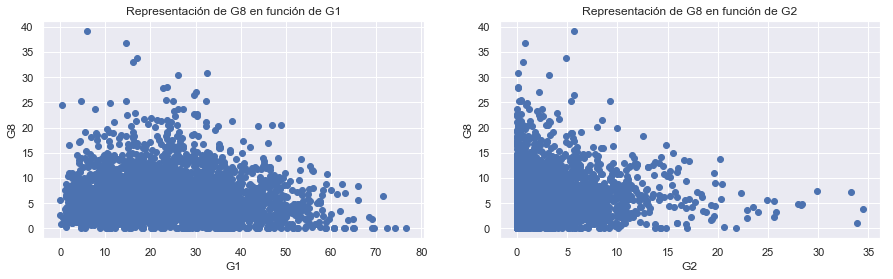

In [28]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)
 
# Represento los puntos para la variable X1 y para Y
p1.scatter(x['_%G1_GT'], y)
p1.set_title(u'Representación de G8 en función de G1')
p1.set_xlabel('G1')
p1.set_ylabel('G8')
 
p2.scatter(x['_%G2_GT'], y)
p2.set_title(u'Representación de G8 en función de G2')
p2.set_xlabel('G2')
p2.set_ylabel('G8')

plt.show()



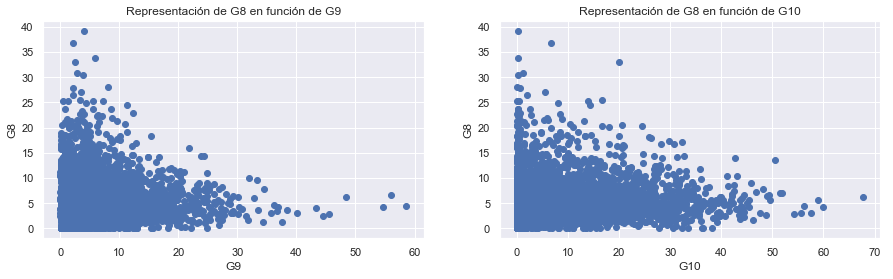

In [29]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)

# Represento los puntos para la variable X1 y para Y
p1.scatter(x['_%G9_GT'], y)
p1.set_title(u'Representación de G8 en función de G9')
p1.set_xlabel('G9')
p1.set_ylabel('G8')
 
p2.scatter(x['_%G10_GT'], y)
p2.set_title(u'Representación de G8 en función de G10')
p2.set_xlabel('G10')
p2.set_ylabel('G8')

plt.show()


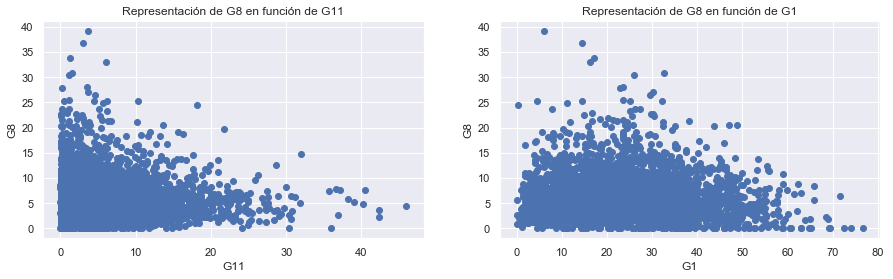

In [30]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)

# Represento los puntos para la variable X1 y para Y
p1.scatter(x['_%G11_GT'], y)
p1.set_title(u'Representación de G8 en función de G11')
p1.set_xlabel('G11')
p1.set_ylabel('G8')
 
p2.scatter(x['_%G1_GT'], y)
p2.set_title(u'Representación de G8 en función de G1')
p2.set_xlabel('G1')
p2.set_ylabel('G8')

plt.show()


__8 Especificación, implementación validación, comparación y decisión del modelo de regresión lineal óptimo__

A continuación se aborda la tarea que entrenar el modelo de regresión lineal y probar su validez.

__8.1 Separación del set de datos__

Es separado el set de datos en 2 subconjuntos. El 70% de los datos se deja para el entrenamiento, y el 30% restante se usará para hacer la prueba.

In [31]:
# Realizamos la selección de dataset para entrenamiento y para prueba.
# El 70% de los datos serán usados para entrenar y el 30% restante para probar.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(x_train.shape); print(x_test.shape)
print(y_train.shape); print(y_test.shape)

(3458, 6)
(1483, 6)
(3458,)
(1483,)


In [32]:
# Realizamos la instanciación del modelo de regresión lineal con los datos seleccionados para el entrenamiento

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
type(model)

sklearn.linear_model.base.LinearRegression

In [33]:
# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred_train= model.predict(x_train)
print("Entrenamiento, Error cuadratico medio:",np.sqrt(round(mean_squared_error(y_train,pred_train),3)))
print("Entrenamiento, R2:", r2_score(y_train, pred_train))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(model.coef_)-1)-1)*(1 - r2_score(y_train, pred_train))
print("Entrenamiento, R2 ajustado:", adj)

pred_test= model.predict(x_test)
print("Testing: Error cuadratico medio", np.sqrt(round(mean_squared_error(y_test,pred_test), 3)))
print("Testing: R2", r2_score(y_test, pred_test))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(model.coef_)-1)-1)*(1 - r2_score(y_test, pred_test))
print("Testing: R2 ajustado", adj)

Entrenamiento, Error cuadratico medio: 0.0
Entrenamiento, R2: 1.0
Entrenamiento, R2 ajustado: 1.0
Testing: Error cuadratico medio 0.0
Testing: R2 1.0
Testing: R2 ajustado 1.0


### OBSERVACION

__8.3 Resultados para el modelo de regresión lineal__

¿Quá ha pasado?

Los valores resultados son muy buenos. Se observa que hay __Overfitting__.


In [34]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(model.coef_),"pvalue": pvalues})
print(coef)

  Caracteristica  Coefficiente lineal        pvalue
0        _%G1_GT                 -1.0  4.276137e-93
1        _%G2_GT                 -1.0  2.059595e-30
2        _%G9_GT                 -1.0  2.330459e-15
3       _%G10_GT                 -1.0  1.567974e-85
4       _%G11_GT                 -1.0  2.671526e-35
5       _%GOT_GT                 -1.0  2.606520e-40


El resultado es inesperado por lo logrado. Todas las caracteristicas se encuentran negativamente correlacionadas con la variable objetivo.

__8.4 Estrategia de regularización__

Dado el resultado anterior, ¿realmente se deben aplicar estrategias de regularización?

Igualmente veremos el comportamiento de los 4 modelo de regresión, usados en el ejercicio anterior como estrategias de regularización:

a. Modelo de regresión lineal RANSAC

b. Modelo de regresión lineal RIDGE

c. Modelo de regresión lineal LASSO

d. Modelo de regresión lineal ELASTICNET

In [35]:
# Realizamos la instanciación del modelo de RANSAC con los datos seleccionados para el entrenamiento

# ransac = linear_model.RANSACRegressor()
ransac = RANSACRegressor()
ransac.fit(x_train, y_train)


# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion

pred_train= ransac.predict(x_train)
print("Entrenamiento, Error cuadratico medio:",np.sqrt(round(mean_squared_error(y_train,pred_train),3)))
print("Entrenamiento, R2:", r2_score(y_train, pred_train))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len( ransac.estimator_.coef_)-1)-1)*(1 - r2_score(y_train, pred_train))
print("Entrenamiento, R2 ajustado:", adj)

pred_test= ransac.predict(x_test)
print("Testing: Error cuadratico medio", np.sqrt(round(mean_squared_error(y_test,pred_test), 3)))
print("Testing: R2", r2_score(y_test, pred_test))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(ransac.estimator_.coef_)-1)-1)*(1 - r2_score(y_test, pred_test))
print("Testing: R2 ajustado", adj)


Entrenamiento, Error cuadratico medio: 0.0
Entrenamiento, R2: 1.0
Entrenamiento, R2 ajustado: 1.0
Testing: Error cuadratico medio 0.0
Testing: R2 1.0
Testing: R2 ajustado 1.0


El modelo lineal RANSAC también presenta __Overfitting__.

In [36]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(ransac.estimator_.coef_),"pvalue": pvalues})
print(coef)

  Caracteristica  Coefficiente lineal        pvalue
0        _%G1_GT                 -1.0  4.276137e-93
1        _%G2_GT                 -1.0  2.059595e-30
2        _%G9_GT                 -1.0  2.330459e-15
3       _%G10_GT                 -1.0  1.567974e-85
4       _%G11_GT                 -1.0  2.671526e-35
5       _%GOT_GT                 -1.0  2.606520e-40


Al igual que el modelo de regresión lineal, las caracteristicas se encuentran perfectamente y negativamente realiacionadas con la variable objetivo.

In [37]:
# Realizamos la instanciación del modelo de Rigde con los datos seleccionados para el entrenamiento
ridge = Ridge(alpha=1)


# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
ridge.fit(x_train, y_train) 
pred_train_rr= ridge.predict(x_train)
print("Ridge/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("Ridge/Ent -  R2:", r2_score(y_train, pred_train_rr))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(ridge.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_rr))
print("Ridge/Ent - adjR2:", adj)

pred_test_rr= ridge.predict(x_test)
print("Ridge/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print("Ridge/Test -  R2:", r2_score(y_test, pred_test_rr))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(ridge.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_rr))
print("Ridge/Test - adjR2:", adj)

Ridge/Ent - MSE: 0.0004822161004836005
Ridge/Ent -  R2: 0.9999999830950669
Ridge/Ent - adjR2: 0.9999999830705811
Ridge/Test - MSE: 0.0005328487573586576
Ridge/Test -  R2: 0.9999999833185453
Ridge/Test - adjR2: 0.9999999832620746


Para este modelo lineal Ridge, el MSE es casi cero, y el R2 y R2 ajustado es casi 1. 

Podriamos seguir pensado que al igual que los casos anteriores aqui ocurre __Overfitting__.

In [38]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(ridge.coef_),"pvalue": pvalues})
print(coef)

  Caracteristica  Coefficiente lineal        pvalue
0        _%G1_GT            -0.999870  4.276137e-93
1        _%G2_GT            -0.999844  2.059595e-30
2        _%G9_GT            -0.999870  2.330459e-15
3       _%G10_GT            -0.999869  1.567974e-85
4       _%G11_GT            -0.999869  2.671526e-35
5       _%GOT_GT            -0.999874  2.606520e-40


Si bien coefientes obtenidos son mayores a -1.0, son muy cercanos a -1.0, para todas las caracteristicas.

In [39]:
# Realizamos la instanciación del modelo Lasso con los datos seleccionados para el entrenamiento
lasso = Lasso(alpha=0.1, tol=00000.1)
lasso.fit(x_train, y_train)

# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
pred_train_lasso= lasso.predict(x_train)
print("LASSO/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("LASSO/Ent -  R2:", r2_score(y_train, pred_train_rr))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(lasso.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_lasso))
print("LASSO/Ent - adjR2:", adj)

pred_test_lasso= lasso.predict(x_test)
print("LASSO/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print("LASSO/Test -  R2:", r2_score(y_test, pred_test_lasso))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(lasso.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_lasso))
print("LASSO/Test - adjR2:", adj)

LASSO/Ent - MSE: 1.5082925924051114
LASSO/Ent -  R2: 0.9999999830950669
LASSO/Ent - adjR2: 0.8343734968422714
LASSO/Test - MSE: 1.6832495877062426
LASSO/Test -  R2: 0.8335349607138309
LASSO/Test - adjR2: 0.8329714365456313


Para el modelo lineal Lasso, se ve que el MSE es 1.5, es decir cercano a 0. Adicionalmente los valores R2 y R2ajustado son cercanos a 1, pero se podría decir que __no hay Overfitting__.

In [40]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(lasso.coef_),"pvalue": pvalues})
print(coef)

  Caracteristica  Coefficiente lineal        pvalue
0        _%G1_GT            -0.576186  4.276137e-93
1        _%G2_GT            -0.557581  2.059595e-30
2        _%G9_GT            -0.599255  2.330459e-15
3       _%G10_GT            -0.584139  1.567974e-85
4       _%G11_GT            -0.597948  2.671526e-35
5       _%GOT_GT            -0.604757  2.606520e-40


Para este modelo lineal Lasso, se ve que la correlación negativa baja a la mitad, varia entre -0.60 y -0.55 

In [41]:
# Realizamos la instanciación del modelo ElasticNet con los datos seleccionados para el entrenamiento
enet = ElasticNet(l1_ratio=0.05, alpha=0.9, tol=00.1)
enet.fit(x_train, y_train) 

# Ahora lo que hacemos es obtener el Error cuadratico medio, R2, y R2 ajustado del
# entrenamiento y la evaluacion
pred_train_net= enet.predict(x_train)
print("E.NET/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_net)))
print("E.NET/Ent -  R2:", r2_score(y_train, pred_train_net))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(enet.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_net))
print("E.NET/Ent - adjR2:", adj)

pred_test_net= enet.predict(x_test)
print("E.NET/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_net)))
print("E.NET/Test -  R2:", r2_score(y_test, pred_test_net))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(enet.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_net))
print("E.NET/Test - adjR2:", adj)

E.NET/Ent - MSE: 1.1394887038313541
E.NET/Ent -  R2: 0.9056047605517733
E.NET/Ent - adjR2: 0.9054680351180419
E.NET/Test - MSE: 1.26194937340965
E.NET/Test -  R2: 0.9064357654996693
E.NET/Test - adjR2: 0.9061190280775288


Se ve que para el modelo ElasticNet, el MSE es cercano a 0, y tanto R2 como R2 ajustado tienen un valor 0.9, es decir cercano a 1. No se podría decir que __ocurre Overfitting__.

In [42]:
scores, pvalues = chi2(x_test.astype('int64'), y_test.astype('int64'))
coef= pd.DataFrame({"Caracteristica":x.columns,"Coefficiente lineal":np.transpose(enet.coef_),"pvalue": pvalues})
print(coef)

  Caracteristica  Coefficiente lineal        pvalue
0        _%G1_GT            -0.690824  4.276137e-93
1        _%G2_GT            -0.637649  2.059595e-30
2        _%G9_GT            -0.691412  2.330459e-15
3       _%G10_GT            -0.689566  1.567974e-85
4       _%G11_GT            -0.689094  2.671526e-35
5       _%GOT_GT            -0.701601  2.606520e-40


Se tiene que el coeficiente lineal para todas las caracteristicas es menoor a -0.63

---

# 9 CONCLUSION

__¿Porqué ocurre que para todos los modelos de regresión lineal probados en este segundo ejercicio, sus resultados son muy buenos, incluso ocurre Overfitting?__

---

Realmente es muy extraño lo ocurrido en este segundo ejercicio, usando las variables en %. 
Y resulta aun más intrigante, considenrando los resultados obtenidos para el primer ejercicio realizado.

Después de darle vueltas un buen rato, hemos concluido que esto se debe básicamente a la completitud de la información que hemos entregado como variables a los modelos de regresión en el ejercicio 2. 
Para entregar un mayor detalle de lo antes mencionado, las variables predictoras junto con la variable objetivo, suman el total de los Gastos, es decir se informa al modelo de regresión lineal el 100% de los gastos.

Cabe entonces hacer una nueva pregunta; ¿tiene sentido hacer un modelo de regresión lineal, dado que se cuenta con el 100% de los gastos? La respuesta es, probablemente no tiene sentido. Pero creemos que como ejercicio académico, aporta valor en términos del aprendizaje, comprensión y aplicación que se hace de modelos de regresión lineal para entrenamiento supervisado en el ámbito del Machine Learning.


---